## Numpy array vs python list

In [42]:
import numpy as np

In [43]:
# speed 
# list
import time
start = time.time()
a = [i for i in range(1000000)]
b = [i for i in range(1000000,2000000)]
c = []
for i in range(len(a)):
    c.append(a[i] + b[i])
print(time.time()-start)

0.43685054779052734


In [44]:
# numpy
a = np.arange(1000000)
b = np.arange(1000000,2000000)
start = time.time()
c = a + b
print(time.time()-start)

0.014948129653930664


### memory

In [45]:
import sys
a1 = [i for i in range(10000000)]
sys.getsizeof(a1)

89095160

In [46]:
a2 = np.arange(10000000, dtype=np.int32)
sys.getsizeof(a2)

40000112

## Advance indexing

In [47]:
a = np.arange(24).reshape(6,4)

In [48]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [49]:
# fancy indexing
a[[0,2,3]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [50]:
a[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [51]:
# boolen indexing
a = np.random.randint(1,100,24).reshape(6,4)

In [52]:
a

array([[23, 43, 44, 51],
       [50, 67, 55,  2],
       [66, 63, 78,  6],
       [72, 91, 96, 23],
       [83, 40, 11, 78],
       [14,  6, 47, 82]])

In [53]:
# find all number greater than 50
a>50

array([[False, False, False,  True],
       [False,  True,  True, False],
       [ True,  True,  True, False],
       [ True,  True,  True, False],
       [ True, False, False,  True],
       [False, False, False,  True]])

In [54]:
a[a>50]

array([51, 67, 55, 66, 63, 78, 72, 91, 96, 83, 78, 82])

In [55]:
# find out even numbers
a % 2 == 0

array([[False, False,  True, False],
       [ True, False, False,  True],
       [ True, False,  True,  True],
       [ True, False,  True, False],
       [False,  True, False,  True],
       [ True,  True, False,  True]])

In [56]:
a[a % 2 == 0]

array([44, 50,  2, 66, 78,  6, 72, 96, 40, 78, 14,  6, 82])

In [57]:
# find all number greater than 50 and all are even
(a > 50) & (a % 2 == 0)

array([[False, False, False, False],
       [False, False, False, False],
       [ True, False,  True, False],
       [ True, False,  True, False],
       [False, False, False,  True],
       [False, False, False,  True]])

In [58]:
a[(a > 50) & (a % 2 == 0)]

array([66, 78, 72, 96, 78, 82])

In [59]:
# find all numbers that are not divisible by 7
a != 7

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [60]:
a[a != 7]

array([23, 43, 44, 51, 50, 67, 55,  2, 66, 63, 78,  6, 72, 91, 96, 23, 83,
       40, 11, 78, 14,  6, 47, 82])

In [61]:
a[a % 7 == 0]

array([63, 91, 14])

## broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

In [62]:
a = np.arange(6).reshape(2,3)
b = np.arange(6, 12).reshape(2,3)

In [63]:
print(a)
print("***********")
print(b)
print("Addition")
print(a+b)

[[0 1 2]
 [3 4 5]]
***********
[[ 6  7  8]
 [ 9 10 11]]
Addition
[[ 6  8 10]
 [12 14 16]]


In [64]:
a = np.arange(6).reshape(2,3)
b = np.arange(3).reshape(1,3)

In [65]:
print(a)
print("***********")
print(b)
print("Addition")
print(a+b)

[[0 1 2]
 [3 4 5]]
***********
[[0 1 2]]
Addition
[[0 2 4]
 [3 5 7]]


# Broadcasting Rules
1. Make the two arrays have the same number of dimensions.

If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.

2. Make each dimension of the two arrays the same size.

If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

# Working with mathematical formulas

In [66]:
a = np.arange(10)

In [67]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [68]:
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [69]:
# sigmoid
def sigmoid(array):
    return 1/(1+np.exp(-(array)))

In [70]:
sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661])

In [71]:
# mean squared error
actual = np.random.randint(1,50 , 25)
pred = np.random.randint(1, 50 , 25)

In [72]:
# mean squared error
def mse(actual , pred):
    return np.mean((actual-pred)**2)

In [73]:
mse(actual , pred)

386.48

### working with missing values

In [74]:
a = np.array([1,2,3 ,4,np.nan, 6])

In [75]:
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [76]:
np.isnan(a)

array([False, False, False, False,  True, False])

In [77]:
a[~np.isnan(a)]

array([1., 2., 3., 4., 6.])

## plotting grapghs

In [78]:
x = np.linspace(-10 , 10 , 100)
y = x

In [79]:
import matplotlib.pyplot as plt

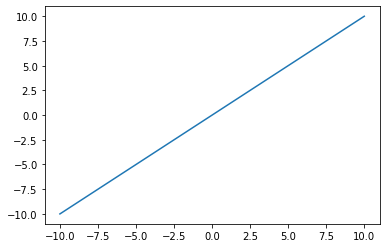

In [80]:
plt.plot(x, y)

In [81]:
x = np.linspace(-10 , 10 , 100)
y = x**2

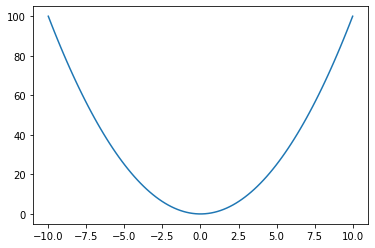

In [82]:
# parabola
plt.plot(x, y)